In [0]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [0]:
def generate_and_plot(scale):
    np.random.seed(42)
    n_classes = 5
    classes = (np.random.random((n_classes, 2))*scale - 0.5) * 5
    y = []
    X = []
    for _ in range(10000):
        cls = np.random.randint(n_classes)
        y.append(cls)
        X.append([np.random.normal(classes[cls][0]), np.random.normal(classes[cls][1])])
    y, X = np.array(y), np.array(X)

    # set training and validation data
    ytrain, Xtrain = y[:700], X[:700]
    yval, Xval = y[700:], X[700:]
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.title("Overall Data")
    plt.show()

    # train both
    lda = LDA()
    lda.fit(Xtrain, ytrain)
    k = KMeans(n_clusters=n_classes)
    k.fit(X)

    # predict kmeans
    preds = k.predict(Xval)
    plt.scatter(Xval[:,0], Xval[:,1], c=preds)
    plt.title("K Means Result")
    plt.show()

    # predict lda
    preds = lda.predict(Xval)
    plt.scatter(Xval[:,0], Xval[:,1], c=preds)
    plt.title("LDA Result")
    plt.show()

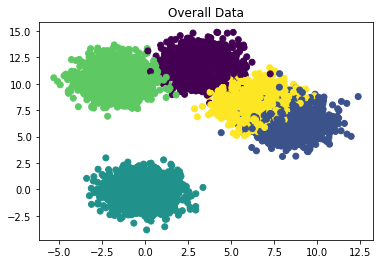

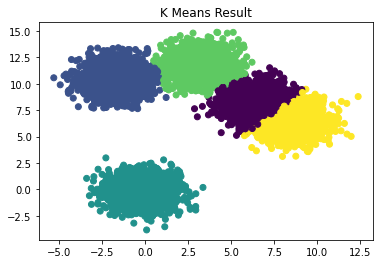

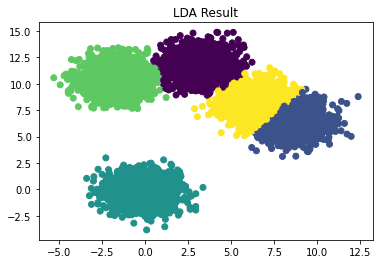

In [3]:
# first, we simulate when groups are far apart by setting scale to 3
generate_and_plot(3)

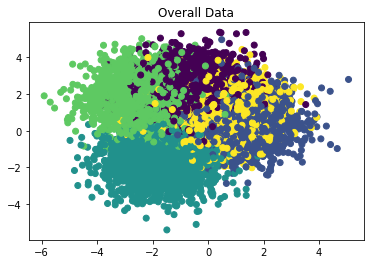

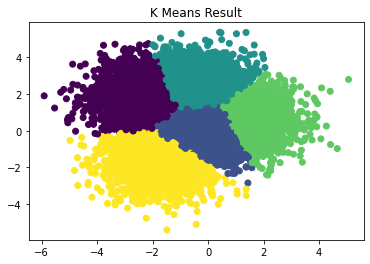

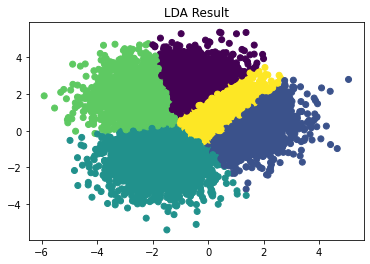

In [4]:
# now, we simulate when groups are closer together by setting scale to 1
generate_and_plot(1)